In [17]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error
from statistics import mean, variance, pvariance
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import math
from sklearn.cross_validation import train_test_split
from sklearn.utils import resample

In [20]:
data = pd.read_csv("processedlaptopinfo.csv", sep = ",")
data = data.sample(frac=1).reset_index(drop=True)

data = data.drop('Unnamed: 0', axis=1)

data = resample(data, n_samples = 470, random_state=0)

traindata, testdata = train_test_split(data, test_size=0.2, random_state=0)

# traindata = data[:-83]
# testdata = data[338:]

Xtrain = traindata.drop('Price', axis = 1)
ytrain = traindata[['Price']]

Xtest = testdata.drop('Price', axis = 1)
ytest = testdata[['Price']]

In [21]:
ada = AdaBoostRegressor(DecisionTreeRegressor(max_depth=10), n_estimators = 50)
ada.fit(Xtrain, ytrain.values.ravel())
ypredict = ada.predict(Xtest)
mean_absolute_error(ytest.values.ravel(), ypredict)

701932.5521228116

[-250000.0, -2100000.0, 0.0, -10000.0, -1704444.444444444, 0.0, 289361.7021276597, 7390000.0, -700000.0, 0.0, 1100000.0, 0.0, 0.0, 0.0, 1300000.0, 0.0, 400000.0, 1490000.0, 2955555.555555556, 0.0, 0.0, 450000.0, 0.0, 0.0, 0.0, 1360000.0, 433333.3333333321, 751857.1428571437, 0.0, -10000.0, -500000.0, -2244285.7142857146, 1833333.333333334, 2199722.222222222, 0.0, 0.0, 450000.0, 699722.222222222, -300000.0, 0.0, 686875.0, -2690000.0, 0.0, 0.0, 0.0, 0.0, -2709818.1818181816, 0.0, 0.0, 0.0, 0.0, 1360000.0, 0.0, 0.0, 3500000.0, 0.0, 1128947.3684210535, 1470000.0, 0.0, 751857.1428571437, 0.0, 0.0, 450000.0, 905666.666666666, 400000.0, 1470000.0, 714848.4848484844, 0.0, 1001000.0, -2282692.307692308, 885714.2857142854, -2400000.0, 751857.1428571437, 0.0, 0.0, -500277.777777778, -560000.0, 700000.0, 0.0, 2799000.0, 400000.0, -300000.0, 0.0, 165277.77777777798, 0.0, 0.0, 305714.28571428545, 916708.333333334, -999000.0, 0.0, 200000.0, -539000.0, 0.0, 1115789.4736842103]


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: scipy.stats.norm.pdf
  if __name__ == '__main__':


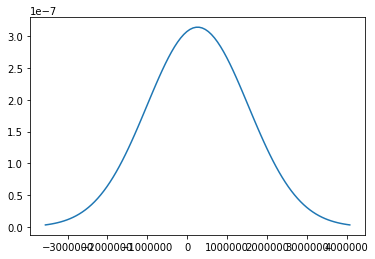

259389.6068883769
1616449495310.0457
1271396.6711101793


In [24]:
err = []
for idx in range(len(ytest.values.ravel())):
    err.append(ytest.values.ravel()[idx]-ypredict[idx])
print (err)
mu = mean(err) #mean_absolute_error(flattentest, ypredict)
var = variance(err) #mean_squared_error(flattentest, ypredict)
sigma = math.sqrt(var)
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.plot(x,mlab.normpdf(x, mu, sigma))
plt.show()
print (mu)
print (var)
print (sigma)